# Relativistische Kinematik

## The Lorentz-Transformation

If we want to change our frame of reference to say that of a relativistically moving particle, like an election inside an an accelerator we need to take into account relativistic effects. This is what the Lorentz-Transform incorporates that the gallilei transform does not. In the case of very small speeds (relative to the speed of light) the Lorentz-Transform can be approximated, with high precision, by the gallilei Transform.

The thing that I did not understand at first and that only dawned on me after trying out a few things is that the Lorenz-transfrom, as the gallilei Transform acts upon coordinate systems, and not on "the universe" so to speak. Let me explain.

To get an intuitive understanding of this let's for a minute designate one reference frame to be THE reference frame. All our information about dimensions and times was measured by equipment that is at rest relative to that reference frame. This is normally called the Laboratory Reference Frame. As part of our lab we have a particle accelerator (every good lab has one laying around nowadays ;)) and now we have particles whizzing through our accelerator. If we now where to imagine ourselves as truly microscopic beings on one of these electorns looking out through a window of the accelerator into our lab (like that window in the accelerator Tony Stark had randomly laying around in his basement (see, every good lab has at least one particle accelerator, the good ones even have windows into the collision chamber so you can see the action ;) )), what would we see?

To answer that question let's take a look at our Lorentz-Transformation and designate the lab frame $L$ and the electron reference frame $E$. To make the math a bit easier at the start let's say that out of sheer coincedence atomic clock in our lab (if you allready have a particle accelerator in your lab you ought to have one of those too) and the imaginary clock on our electron read 0s exactly when the electron moves through the interaction point and the interaction point is designated $\vec{0}$ or the origin of our lab coordinate system $L$ and also perfectly aligns with it. So in short $E$ and $L$ coincide in position and attitude and the time in both reference frames is 0.0000000000000...s . One last thing, the electron is movin in the $\vec{e_z} = \vec{e_z}'$ direction ($\vec{e_z}$ is the unit vector  in z direction and the `'` on the vectors indicate that we are in the $E$ instead of $L$).

In the special case described above the Lorentz-Transform can be defined as:

$$
x=x'\\
y=y'\\
z=\gamma(z'+\beta_zct')\\
ct=\gamma(\beta_zz'+ ct')\\
$$

## Getting a feeling for transformation with the Galilei Transformation
So this transformation relates the basis vectors of the two coordinate systems with each other. Let's take a look at how the galilei transfrorm works to get a feel for the Lorentz-Transform (as I said earlier, the Lorentz-Transform can be approximated by the galilei transform so the general principles of the transformation must be the same)

As simplifying assumption we will assume the same situation as above so the clocks are syncronized and the reference frames $L$ and $E$ coincide in position and attitude at time 0. This time though we will assume that relativistic effects are non existant and the electron is moving with speed $v$ along the $\vec{e_z} = \vec{e_z}'$ axis.

At time $t=t'=0$ the situation looks as follows:

---
<img src="Gallilei_Transform_at_t0.svg" alt="gallilei transform at t=0" width="200">

---
And after some time $t$ the the electron has moved relative to the lab-origin and is now at:

$$
x'=x\\
y'=y\\
z'= z + v\cdot t\\
t' = t
$$

---
<img src="Gallilei-Transform-illustration.svg" alt="gallilei transform after some time" width="300">

---

So if we imagine an object $O$ at the position $\begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}$ in the lab Frame, after the time $t$ that object will haved moved to $\begin{pmatrix} 1\\ 0\\ -v\cdot t \end{pmatrix}$ in the electron reference frame.

If we where to blindly apply our transformation rules to the position of the $O$ we would however get the following position: $\begin{pmatrix} 1\\ 0\\ v\cdot t \end{pmatrix}$
This is not even close to the actual position. This is clear to us because of the intuitive understanding of the galilean transfromation. It get's a bit more tricky when we add in the scale changes introduced by the Lorentz transformation.

As I said, the transformation applies to the Basis vectors of a reference system. If we now want to know what the "world" (aka our Lab system) looks like from the electrons point of view, we need to use the reference system (so position *and scale* of the electron and as our "normal" system and then apply the inverse of the results of the transform into the electron system to figure out how the "world" looks like.

In [1]:
#import the things needed to do the calculations in python
from sympy import *
import numpy as np
from matplotlib import pyplot as plt

First off we look at what that would look like for the galilei transform. As this is a linear transform we can describe the transformation as a matrix $\mathbf{T}$ (for the possible change of basis-vector configuration) with an added vector that accounts for the translational difference between the reference systems.

In [2]:
#define the symbols needed
x, y, z, t, v = symbols('x, y, z, t, v')
#define the matrix that transforms our Lab frame into our electron frame
gt = Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
gt

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

So this matrix tells us, how the basis vectors of the electron reference frame look like when compared to those of the lab reference frame.

There is a massive problem trying to visualize things here, as we don't normally visualize the reference frame (we also can't visualize a changed reference system from within becaus by definition we can only visualize reference systems from an outside perspective, as from within everything that should look right looks right.

---
<img src="transform_of_basis_vectors.svg" alt="the cube is a cube inside both reference frames" width="300"> 

---

So here goes, the previous picture assumes that we are looking at the System $L$ and $E$ from within a eucledian geometry. 

In $L$, which has a euclidian geometry, and all vectors are of equal length that we will arbitrarily call 1 L-meter, and are perpendicular to each other. I said "L-meter" to denote that inside $L$ the length of one of the basis arrows is one meter long, however the scale of the system could be different to our scale.

We are then also looking at $E$ which has a non euclidian reference frame. It is possible to see that the y'-axis is shorter than the one in $L$, it is also at a non-90 degree angle to the x' and z' axis.

Computer games, especially simulators are a good way to think about the concept above. When an artist models an aircraft for example he could request the plans for that vehicle from the manufacurer. Having received the plans they set of and start modeling the aircraft in some modeling software. This software will have some notion of a unit length. So the artist may choose that unit length to be equivalent to one meter in the real world. On their screen this unit lenth may however only be a few centimeters long and on top of that will probably change as the artist goes from modeling structures like the engine pods to modeling switches in the cockpit.

In the example only the scale changed, but it would be similarly possible to change the orientation of basis vectors relative to the rest, distorting the world and everything with it. We as people looking at the screen only notice this because we know what the aircraft should look like (we could look at the plans of the manufacturer and notice that the angles and other geometry looks weird).

Coming back to our matrix we can see from the matrix, that the galilei-transformation does not change the length or angle towards other vectors. This special transform also does not rotate anything (the general galilei transform also includes rotations).

We can easily check that the basis vectors in both systems are identical

In [3]:
# basis vectors in our lab reference frame
e_x = Matrix([1, 0, 0])
e_y = Matrix([0, 1, 0])
e_z = Matrix([0, 0, 1])
# we can check the vectors in L versus E
e_x == gt*e_x

True

In [4]:
e_y == gt*e_y

True

In [5]:
e_z == gt*e_z

True

If we take a look at the transform we can see that we are still missing the translation from the transformation. Translations can't be expressed by matricies as they simply map vectors that start at the same point to other vectors that start at the same point. It can't change the starting point, that's what additions are for (there are tricks for using matricies but we will not consider this here).

So the translational part of this transformation is a vector $\vec{t}$ (this is not a vectorised form of the time variable but the t here stands for "translation") looks like

$$\begin{pmatrix} 0 \\ 0 \\ v\cdot t \end{pmatrix}$$

This leads to the final form of the transforation looking like 

$$\begin{pmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\\\end{pmatrix} \cdot \left(\begin{pmatrix} 0 \\ 0 \\ v\cdot t \end{pmatrix}+\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}\right) = \begin{pmatrix} x_1 \\ x_2 \\ (v\cdot t) + x_3\end{pmatrix}$$

or in more general terms

$$ \vec{x}' = \mathbf{T}\cdot(\vec{t}+\vec{x})$$

where $\vec{x}$ being the vector in the origin reference frame and $\vec{x}'$ being the same vector viewed from the destination reference frame.

In [6]:
tv = Matrix([0, 0, v*t])
tv

Matrix([
[  0],
[  0],
[t*v]])

In [7]:
x_1, x_2, x_3 = symbols('x_1 x_2 x_3')
xv = Matrix([x_1, x_2, x_3])
xv

Matrix([
[x_1],
[x_2],
[x_3]])

In [8]:
_xv = gt*(tv+xv)
_xv

Matrix([
[      x_1],
[      x_2],
[t*v + x_3]])

As we can see, sympy agrees with the aformentioned calculation.

### What are we transforming between reference systems
Now this is the part that took me forever to get into my head. When we look at galilei transform the thing that it does is change the point of view of the world. To accomplish that we figure out how a point in space in our origin reference system corresponds to a point in the destination reference system. If it is possible to do this for a single point, everything that is based upon the concept of a point (essentially all geometric objects are constructed of points (a line is a set of points, as is a sphere and a cube)) can be transformed into the view from the  destination reference frame.

I say view here because I am not changing the thing itself but only how it looks, or in more mathematical terms how it is represented. A vector $\vec{x}$ is the same vector in both reference frames but if it it's components are written out, the value of each component depends on the reference frame that $\vec{x}$ is viewed in.

The question now is what are we transforming when we use the lorentz transformation. If we take a look at how the transfom is defined as, it takes a 4 component vector of which 3 components describe the point in space and the 4th component (or the 0th depending on convention) describes the location in time and spits out a the same type of vector with different component values.

This is obvious, getting an idea of what that means is not quite as intuitive when coming from the galilean transform. When we think of objects, we don't really give them a time coordinate. A specific Car still is that car in 10 years (assuming it does not wear or rust). However to be able to transform something from one reference frame to anothe using the Lorentz transform we need to assign it a point in time. This means that the only thing that can be transformed from one frame to another is an event. Objects (at least in the way we think of them as things in 3D space)can't be described if they are to be transformed using the Lorentz transfrom as they don't have a time coordinate.

We could say: The car is at position $\vec{b}$ at time $t$, but that again corresponds to an event because we have added time information.

So if we can't specify objects so that their representation can be transformed from one reference frame to another then how do we define a length? Or really any geometric object then (they are based on points after all and not on events)?

### Observation is a series of events
The key thing here is that to know something, it has to be measured/observed. As physics does not have any mechanism for action at a distance (at least when we look at modern physics) we have to inferr the things around us by observing the quantities at the location of measurement.

To make this point a bit more understandable intuitively. Yes physics has the concept of fields and magnets seem to attract or repell each other at a distance, and that would conflict with the statement that I made above. If viewed from a quantum mechanical perspective, what happens is that the magnets are actually sending photons back and forth between each other and only when a photon interacts with, say an electron or a proton of one of the magnets the momentum/Energy transported by the photon transfers to the electron or nucleus. To be even more precice, the magnet that you think of as a solid block of metal is in fact made up of unimaginably many electorns an nuclei all emitting photons all the time and some of these photons interact with other electrons and nuclei of the same magnet, pulling and pushing each other around and through a whole bunch of phenomenons decide to clump together into the magnet that you hold in your hand. The transfer of momoentum inside the magnet and from the magnet to your hand then is done by your hand interacting with the photon stream coming from differnt atoms/nuclei/electrons from the magnet that it is holding. This magnet has to transfer more momentum to your hand because it's being bombarded by photons coming from the other magnet. You may wonder why your hand would then interact with the photons coming from the magnet in your hand but not from the magnet further away. This is due to the structure of the magnet which leads to the moments transfered to the magnet being pointed in the same direction, while your hand absorbs photons from the other magnet that transfer momentum into all different directions effectively canceling each other out.

So we have to send out a wave (light in this case) and observe what arrives back at our sensors after a certain time t.
Essentially the only way we can think of objects so that they can be transformed between reference frames is in the way that a Radar would see the them (passive or active, both works, even though you lose time information if you only use passive radar). A Radar sends out a pulse and wait's till it hears a response. It tries to construct a view of it's surroundings by doing that over and over and over. LIDAR (LIght Detection And Ranging) does the same thing with (close to) visible light.
So we are actuelly not transforming an object but events of sending out and receiving phothons. We then have to infer the rest.

So to measure a length l we need to make some assumptions first. The first one is that Space is isotropic when the speed of light is concerned, that means that the speed of light is the same in all directions. See [this very good explanation why this is a fundamental assumption](https://www.youtube.com/watch?v=pTn6Ewhb27k). Then, as is the postulate of special and general relativity we need to assume that the speed of light is the same in all reference frames (this is the reason we use the Lorentz transform in the first place). Then we need to assume that photons travel in a straight line (which in all but the most gravitationally disturbed cases it seems to do). With that we measure the time it takes a photon from emission at our sensor (the RADAR emitts a pulse) to the photon being received back at our sensor (the RADAR measures the pulse it sent earlier), divide by two and have the length of our object (or more precicely the distance to whatever reflected our photons). Length (ormore precicely distance to something) is **defined** by this procedure.

In [9]:
x, y, z, t = symbols('x, y, z, t')
_x, _y, _z, _t = symbols("x', y', z', t'")
beta, gamma = symbols('beta_z, gamma')
v_z, c = symbols('v_z, c')

The following cell defines some common formulars in a way that can be easily loaded into various functions of the CAS. The key of the dictionary is the variable that can be expressed by the value of the corresponding key.

In [10]:
# ausdruecke fuer die relativistischen Faktoren
# die ausdruecke fuer c und z. Diese Datenstruktur ist effektiv eine Formelsammlung
formulars = {beta: v_z/c, gamma:1/(sqrt(1-beta**2)), t:(gamma/c)*(beta*_z+c*_t), z:gamma*(_z+beta*c*_t)}

The Lorentz transform as the galilei transform is linear, so it can be represented bt a matrix plus a vector. This time however, the matrix looks a bit more complicated. The '0'th component is the time component and extends the rank of the Matrix to 4.

The situation is the same as above, an electron moving in $\vec{e}_z$ direction at a fraction of the speed of light where the electron reference frame $E$ coincides in position and attitude at $t=t'=0$ with the lab reference frame $L$.

In [11]:
L_z = Matrix([[gamma, 0, 0, beta*gamma], [0, 1, 0, 0], [0, 0, 1, 0], [beta*gamma, 0, 0, gamma]])
L_z

Matrix([
[       gamma, 0, 0, beta_z*gamma],
[           0, 1, 0,            0],
[           0, 0, 1,            0],
[beta_z*gamma, 0, 0,        gamma]])

In [12]:
_v = Matrix([c*_t, _x, _y, _z])
L_z*_v

Matrix([
[beta_z*gamma*z' + c*gamma*t'],
[                          x'],
[                          y'],
[beta_z*c*gamma*t' + gamma*z']])

In [13]:
# Die formel fuer die Transformation von S' nach S laesst sich mit dem Inversen der Matrix berechnen
vec = Matrix([c*t, x, y, z])
L_z.inv().applyfunc(lambda x: x.simplify().subs(1-beta**2, 1/gamma**2))*vec

Matrix([
[-beta_z*gamma*z + c*gamma*t],
[                          x],
[                          y],
[-beta_z*c*gamma*t + gamma*z]])

As can be seen, the transformation gives the same results as stated at the very beginning of this document, so that's all good.
The CAS also verifies that the expressions are formally identical.

In [14]:
(L_z*_v)[3].factor() == formulars[z].factor()

True

In [15]:
(L_z*_v)[0].factor() == c*formulars[t].factor()

True

With the initial discussion of the problem done, let us apply this model to a (somewhat (un)realistic) application.

## Length Contraction

One of the two most commonly recited effects is the effect of length contraction. This means that something in the lab frame will appear shorter in the electron frame, as long as it is oriented in the direction of travel of the electron.

To get a first impression let us assume that in the lab frame there is a sphere around our interaction point (the point in space where the reference frames coincide at $t=t'=0$) and that we want to look at our sphere from the perspective of the electron.

There is a bit of a problem here. As the electron is movin at a considerable fraction of the speed of light many things get complicated. First off, as expressed above, the only thing that can be transformed using the Lorentz transformation are events. So we can't simply transform the sphere, as it is not an event. So to be able to get a "picture" of a sphere we first need to somehow describe the sphere as a series of events.

This is where the RADAR analogy comes in handy. If we assume we have a very sophisticated RADAR on our electron, that can send and receive signals in all directions simultaneously (normal RADARs can only do so sequentially, the sweeping line on the radar displays of many movies is the direction in which the radar is currently measuring the distance to a possible object. Modern radar may seem to be simultaneous, it is however only doing the same thing as the old one, only it is capable to do so very very quickly) it is possible to rephrase the problem of how the world looks as a series of events which in turn can be transformed between $E$ and $L$.

If we emmitt a pulse exactly at the $t=t'=0$, so in the center of the sphere, the distance to the sphere, by definition, is the time it takes for the pulse to arrive back at the receiver.

There is one further problem though. As the electron is moving very quickly it will actually cover considerable distance in the time it takes the light to reach, be reflected and travel back to the electron from the sphere. Depending on how you intuitively think about distance you have to either correct for that or not.

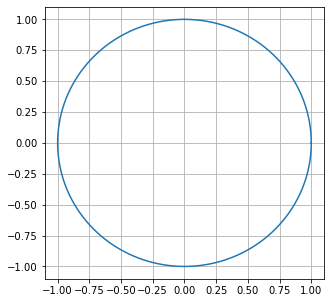

In [16]:
# as the whole thing is symmetrical around the direction of travel, we only need to look at a circle in the y,z plane.
# d is the parameter of the function that will draw the circle
d = np.linspace(0, 2*np.pi, 10000)
# remember the pyhton variables are allready bound to the symbols y and z
y_coord = np.sin(d)
z_coord = np.cos(d)
fig = plt.figure(figsize=(5,5))
plt.plot(z_coord, y_coord)
plt.grid()

so we emitt a pulse at $t=t'=0$ so, in the lab reference frame the light reaches the sphere at the same time $t_a = \frac{r}{c}$ where $r$ is the radius of the sphere and in this example is 1.

As we are now dealing with events we can easily transform them back and forth between reference frames. Therefore we will look at everything in the lab reference frame and then transfor it into the electron reference frame.

So let's generate the set of events that constitute the reflection of photons from the sphere.
We will need to generate 4D vectors

We are only looking at events on a sphere so we can simply set the x value to be 0 and reconstruct the results through symetry.

Also remember the 0th component is $t\cdot c$

In [17]:
reflection_events = [Matrix([1, 0, y_c, z_c]) for y_c, z_c in zip(y_coord, z_coord)]

Now we need to calculate the time and place that the reflected photons reach the electron.

<img src="derivation of timing equation lorentz transform.svg" width=500>

So we know that the electron travels at speed $v$ and the light at speed $c$ so we need to solve the equation

$$
\frac{a+b}{c} = \frac{e}{v}
$$

In [18]:
a, b, e, _d = symbols('a b e d')
timing = Eq((a+b)/c, e/v_z)
timing

Eq((a + b)/c, e/v_z)

In [19]:
# from the definition of the sphere we know a to be 1
# b is a bit more complicated we use the definition of the vector length and the knowledge about the position d
timing = timing.subs(b, sqrt(cos(_d)**2 + (v_z*t - sin(_d))**2))

In [20]:
# expand the definition of e and a 
timing = timing.subs(e, v_z * t).subs(a, 1)

In [21]:
timing

Eq((sqrt((t*v_z - sin(d))**2 + cos(d)**2) + 1)/c, t)

In [22]:
# we can now simplify (this step we have to do by hand)
timing = Eq((t*c -1)**2, (t*v_z -sin(_d))**2+cos(_d)**2)
timing

Eq((c*t - 1)**2, (t*v_z - sin(d))**2 + cos(d)**2)

In [23]:
timing = timing.expand()
timing = timing.simplify()

In [24]:
timing

Eq(c**2*t**2 - 2*c*t + 1, t**2*v_z**2 - 2*t*v_z*sin(d) + 1)

In [25]:
# the above equation looks like a fairly simple equation to solve so the computer should be able to find a solution here
# and as you see it does
solveset(timing, t, domain=S.Reals)

Intersection(FiniteSet(0, 2*(c - v_z*sin(d))/((c - v_z)*(c + v_z))), Reals)

With this equation we can solve the time of arrival, and as we know the speed of the electron with that the point of arrival of the various reflected photons from our sphere (To be more precice here, wh did not send one photon in each direction but many photons. These photons did not reflect off of the sphere but got scattered and so we assume each point of the sphere scatters in every direction and that we can determin the direction of incoming photons).

The solution that is 0 here is the moment where the radar emitts the pulse.

So let's go ahead and calculate the arrival event for the various photons.

To do this we need to first define the constants that are to be used.

In [64]:
speed_of_light = 299_792_458
speed_of_electron = speed_of_light*0.5
# this is the solution from above transfered to a sympy expression by hand
expr_t = (2*(c-v_z*sin(_d)))/((c-v_z)*(c+v_z))
arrival_events = [Matrix([expr_t*c, 0, 0, expr_t*v_z]).subs(c, speed_of_light).subs(v_z, speed_of_electron).subs(_d, p).evalf() for p in d]

The thing to notice now is, that we are currently relating the position of the reflection event and the arrival event over their position within their respective event arrays. We calculated the reflection events for every (discretized) point of the circle and used the same parameter to then calculate the arrival based upon the same parameter while coupling that to the reflection point in the formula.

In reality this would not be possible as we cant give each photon group a number. but for now that will be useful.

We will use this information to give every point on the circle a color according to when the photons scattered by this particular point arrived at the electron. It is also possible to then give the same color coding to the track of the electron.
I used the example [here](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/multicolored_line.html#sphx-glr-gallery-lines-bars-and-markers-multicolored-line-py) ase guide for the code

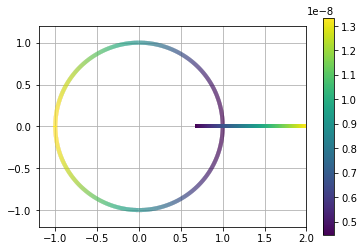

In [65]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

# from the events we need to extract the three components of interest: z(d), y(d) and t(d)
z_coord # we allready have this as we used it to construct the reflection event
y_coord # same for this
t_points = np.array([float(event[0]) for event in arrival_events])/speed_of_light # average out the time as we are interested in the lines not the points
t_means = 0.5*(t_points[1:]+t_points[:-1]) # we are assuming here that the whole thing behaves linearly for small steps

# no turn the points into line segments
points = np.array([y_coord, z_coord]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

electron_positions = np.array([[t_point*speed_of_electron, 0] for t_point in t_points]).reshape(-1,1,2)
electron_segments = np.concatenate([electron_positions[:-1], electron_positions[1:]], axis=1)
fig, axs = plt.subplots()
axs.set_aspect('equal')
plt.xlim(-1.2, 2)
plt.ylim(-1.2, 1.2)
plt.grid()
# normalize so that we get the entire color range
norm = plt.Normalize(t_means.min(), t_means.max())

lc = LineCollection(segments, cmap='viridis', norm=norm)
e_lc = LineCollection(electron_segments, cmap='viridis', norm=norm)
lc.set_array(t_means)
e_lc.set_array(t_means)
lc.set_linewidth(4)
e_lc.set_linewidth(4)
line_ = axs.add_collection(lc)
line__ = axs.add_collection(e_lc)
fig.colorbar(line_, ax=axs)
plt.show()

As can be seen in the picture above, the electron sees parts of the sphere after the electron has moved outside of it's perimiter. The electron is furthermore "only" traveling at about 0.5 times the speed of light.

So now we have a set of events (the events that constitute the pulse arriving at the sphere and then the scattered pulse arriving at the electron) and as I have said we can transform these events with the lorentz transform.

To do that we have to evaluate the symbolic expression representing that transform.

In [66]:
# rewrite the matrix so that only terms with v and c remain
L_z_reformulated = L_z.applyfunc(lambda x: x.subs(gamma, formulars[gamma]).subs(beta, formulars[beta]))
L_z_reformulated

Matrix([
[      1/sqrt(1 - v_z**2/c**2), 0, 0, v_z/(c*sqrt(1 - v_z**2/c**2))],
[                            0, 1, 0,                             0],
[                            0, 0, 1,                             0],
[v_z/(c*sqrt(1 - v_z**2/c**2)), 0, 0,       1/sqrt(1 - v_z**2/c**2)]])

In [67]:
# nun muss noch c und v_z ein wert zugewiesen werden und wir koennen die koordinaten transformieren, wir verwenden
# dafuer wieder den substitutionsmechanismus den wir oben verwendet haben
eval_L_z = L_z_reformulated.applyfunc(lambda x: x.subs(v_z, speed_of_electron))
eval_L_z = eval_L_z.applyfunc(lambda x: x.subs(c, speed_of_light))
eval_L_z

Matrix([
[ 1.15470053837925, 0, 0, 0.577350269189626],
[                0, 1, 0,                 0],
[                0, 0, 1,                 0],
[0.577350269189626, 0, 0,  1.15470053837925]])

In [68]:
# now that we have a numericaly evaluated lorentz transform we need to apply it.
transformed_reflection_events = [eval_L_z.inv()*revent for revent in reflection_events]
transformed_arrival_events = [eval_L_z.inv()*aevent for aevent in arrival_events]

Now we have to visualize those transformations. Let's start with the circle from the lab frame first

In [69]:
L_z

Matrix([
[       gamma, 0, 0, beta_z*gamma],
[           0, 1, 0,            0],
[           0, 0, 1,            0],
[beta_z*gamma, 0, 0,        gamma]])

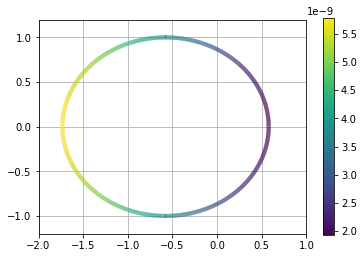

In [70]:
_y_coord = np.array([event[2] for event in transformed_reflection_events])
_z_coord = np.array([event[3] for event in transformed_reflection_events])
_t_coord = np.array([float((event[0]/speed_of_light).evalf()) for event in transformed_reflection_events])

t_means = 0.5*(_t_coord[1:]+_t_coord[:-1])
# we will color the points with the time of reflection in this plot
points = np.array([_z_coord, _y_coord]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.grid()
plt.xlim(-2, 1)
plt.ylim(-1.2, 1.2)

norm = plt.Normalize(t_means.min(), t_means.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
lc.set_array(t_means)
lc.set_linewidth(4)
line_ = ax.add_collection(lc)
fig.colorbar(line_, ax=ax)
plt.show()

Notice the shift in the z-coordinate of the sphere when viewed from the point of view of the electron. So everything in front of the electron seems to be closer to it. and everything behind the electron moves further away. This is somewhat intuitive.
Also the light coming from the rear of the circle was reflected at a later point in time as the light at the front of the circle, this also makes sense as the reflection happened further away. Again everything makes sense in the reference frame of the electron, as it should.

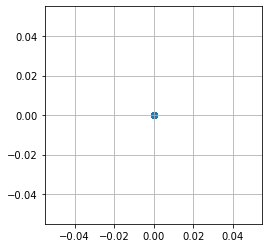

In [82]:
_y_coord = [event[2] for event in transformed_arrival_events]
_z_coord = [event[3] for event in transformed_arrival_events]
_t_coord = [float(event[0]/speed_of_light) for event in transformed_arrival_events]

fig, ax2 = plt.subplots()
ax2.set_aspect('equal')
plt.grid()
ax2.scatter(_z_coord, _y_coord)
plt.show()

Looking at the arrival events, they all match up to be at the center of our electron reference frame, so everything is as it should be. This shows, that the Lorentz transform, by the virtue of including the time component into the vector and therby the matrix, is able to account for the shift in the position of the electron reference system when compared to the lab system over time.

Another important takeaway here is that the length "contraction" is only seen for things that are "in front of" the electron. The things behind the electron stretch out again. if the electron had emitted the pulse at an earlier time, being outside the circle heading for it, the circle would have seemed squished. On the other hand the sphere shoul appear streched out if the electron had emitted the pulse after leaving the perimiter of the sphere.

With the code provided here this should be an easy exercise to check these assumptions.

## The Derivative of 4-vectors
Another one of those things that you can write down and that don't neccesarily make sense to me 